In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.shape

(4177, 9)

Univariate Analysis

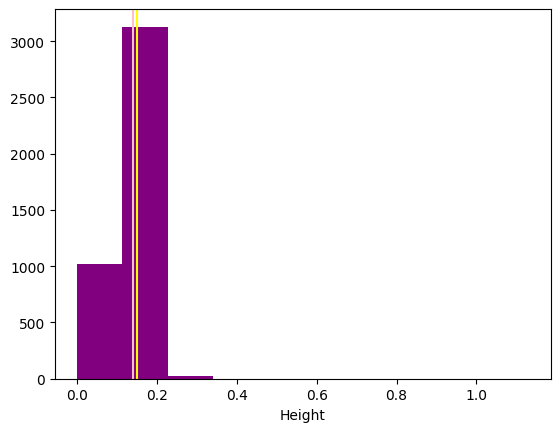

In [4]:
from turtle import color
plt.hist(df['Height'],color="purple")
plt.xlabel("Height")
plt.axvline(np.median(df['Height']),color = 'pink')
plt.axvline(df['Height'].mode().values[0],color = 'yellow')
plt.show() 

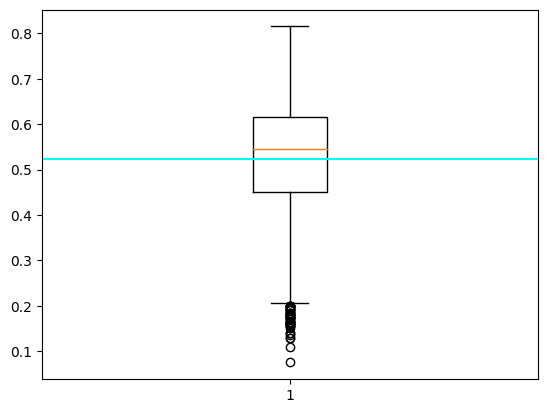

In [5]:
plt.boxplot(df['Length'])
plt.axhline(np.mean(df['Length']),color = 'cyan')
plt.show()

C:\Users\SSS\AppData\Local\Temp\ipykernel_5024\3530411432.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot (y=df['Diameter'],palette="Pastel2_r")


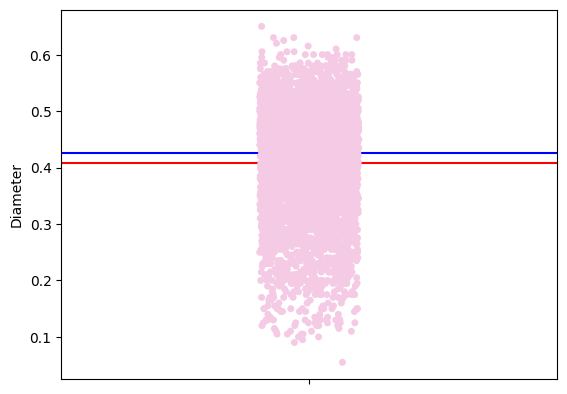

In [6]:
import seaborn as sns
sns.stripplot (y=df['Diameter'],palette="Pastel2_r")
plt.axhline(np.median(df['Diameter']),color = 'blue')
plt.axhline(np.mean(df['Diameter']),color = 'red')

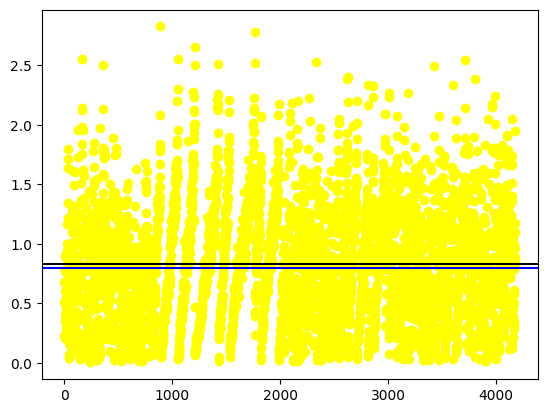

In [7]:
plt.scatter(df.index,df['Whole weight'],c='yellow')
plt.axhline(np.median(df['Whole weight']),color = 'blue')
plt.axhline(np.mean(df['Whole weight']),color = 'black')

BIVARIATE ANALYSIS

<AxesSubplot: xlabel='Sex', ylabel='count'>

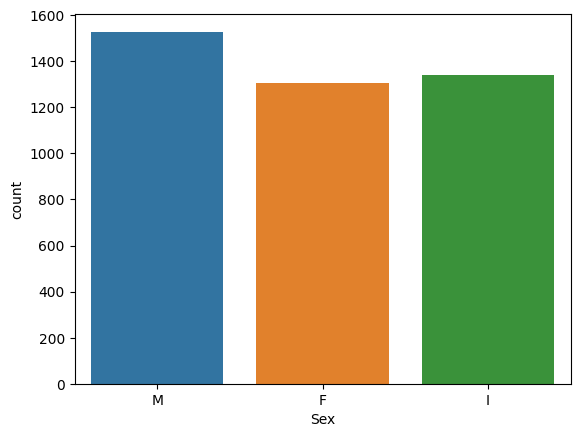

In [8]:
sns.barplot(x='Sex',y='Height',data=df)
sns.countplot(x='Sex',data=df)

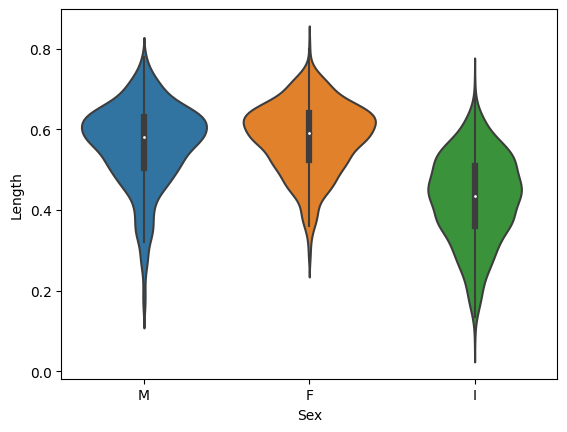

In [9]:
sns.violinplot (x="Sex", y="Length", data=df, size=8) 
plt.show()

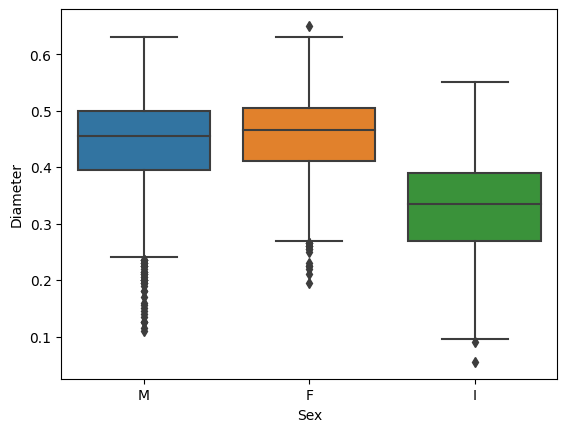

In [10]:
sns.boxplot (x='Sex',y='Diameter', data=df) 
plt.show()

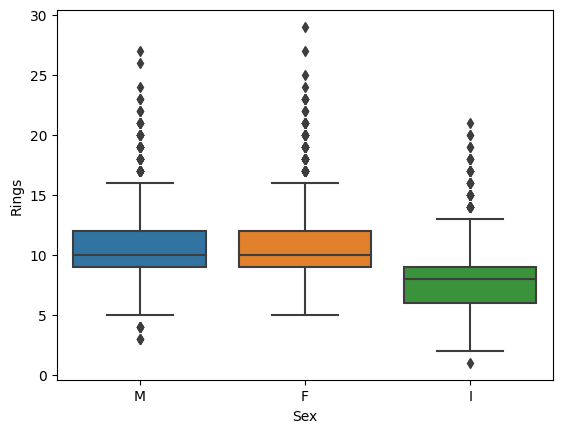

In [11]:
sns.boxplot (x='Sex',y='Rings', data=df) 
plt.show()

MULTIVARIATE ANALYSIS

c:\Users\SSS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


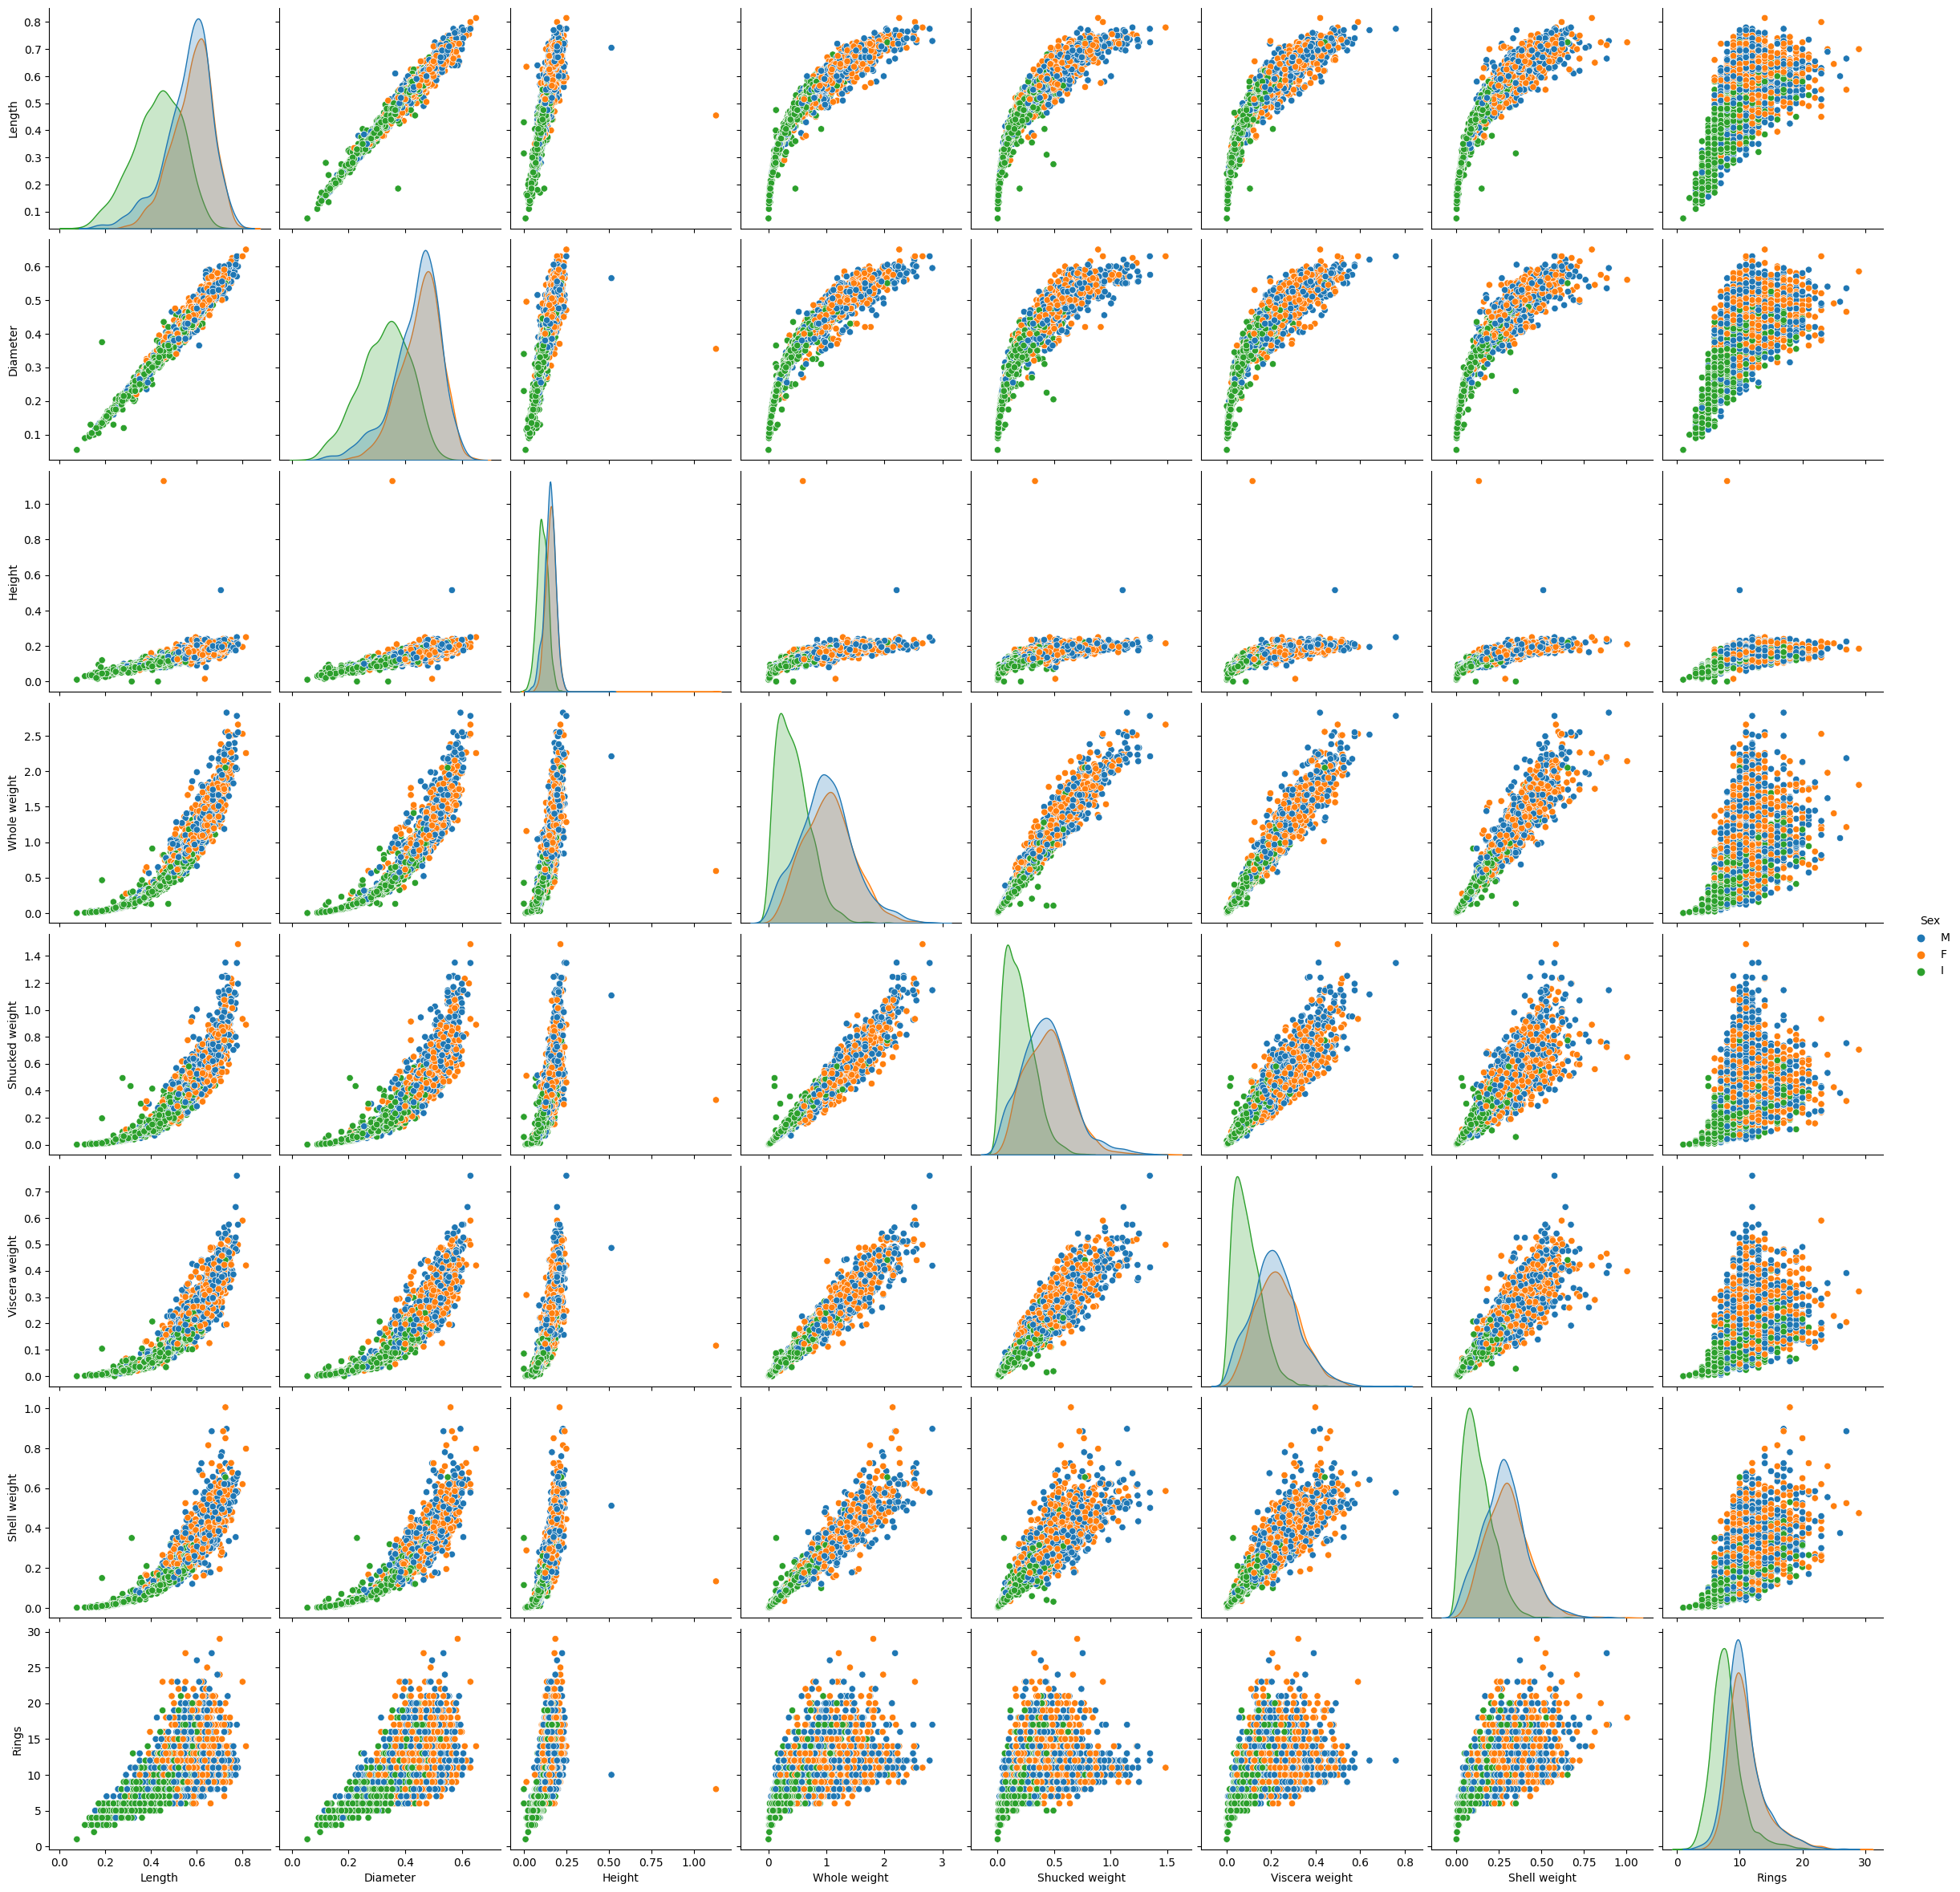

In [12]:
sns.pairplot (df, hue="Sex", size=3)
plt.show()

Descriptive Statistics

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
gd = df.groupby(['Sex'])
gd['Length'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,0.579093,0.086160,0.275,0.525,0.590,0.64,0.815
I,1342.0,0.427746,0.108858,0.075,0.360,0.435,0.51,0.725
M,1528.0,0.561391,0.102697,0.155,0.505,0.580,0.63,0.780


In [15]:
gd['Diameter'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,0.454732,0.070954,0.195,0.410,0.465,0.505,0.65
I,1342.0,0.326494,0.088109,0.055,0.270,0.335,0.390,0.55
M,1528.0,0.439287,0.084398,0.110,0.395,0.455,0.500,0.63


In [16]:
gd['Rings'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


In [17]:
gd['Whole weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,1.046532,0.430316,0.0800,0.730000,1.03850,1.320250,2.6570
I,1342.0,0.431363,0.286275,0.0020,0.205500,0.38400,0.599375,2.0495
M,1528.0,0.991459,0.470581,0.0155,0.671625,0.97575,1.265625,2.8255


In [18]:
gd['Diameter'].mean().reset_index()

,Sex,Diameter
0,F,0.454732
1,I,0.326494
2,M,0.439287


Check for Missing values and deal with them.

In [19]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [20]:
Q1 = np.percentile(df['Rings'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Rings'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

C:\Users\SSS\AppData\Local\Temp\ipykernel_5024\1211644707.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Rings'], 25,
C:\Users\SSS\AppData\Local\Temp\ipykernel_5024\1211644707.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Rings'], 75,


In [21]:
IQR

3.0

In [22]:
upper = np.where(df['Rings'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Rings'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

<AxesSubplot: ylabel='Rings'>

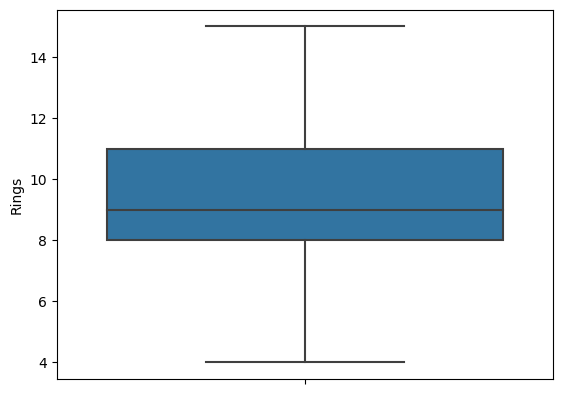

In [23]:
sns.boxplot(y = df['Rings'], data=df)

In [24]:
df.shape

(3899, 9)

Check for Categorical columns and perform encoding

In [25]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Sex']

In [26]:
data_categorical = df[categorical_columns]
data_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoded = label_encoder.fit_transform(df[categorical_columns])
np.unique(encoded)


c:\Users\SSS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2])

In [28]:
df[categorical_columns[0]] = encoded

In [29]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Split the data into dependent and independent variables

In [30]:
X= df.iloc[ : , [True, True, True, True, False, True,True,True,True]].values 
print(X[0])
y= df.iloc[ : , 4].values
print(y)

[ 2.      0.455   0.365   0.095   0.2245  0.101   0.15   15.    ]
[0.514  0.2255 0.677  ... 1.176  1.0945 1.9485]


Scale the independent Variables

In [31]:
Standardisation = preprocessing.StandardScaler() 
new_X= Standardisation.fit_transform(X) 

In [32]:
new_X[0]

array([ 1.15793206, -0.55104264, -0.40422906, -1.03555703, -0.58564588,
       -0.69758868, -0.60447624,  2.34470064])

Split the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Build and Train the Model

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
y_test_pred = lm.predict(X_test)

In [36]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

Test the Model

Text(0, 0.5, 'Predictions')

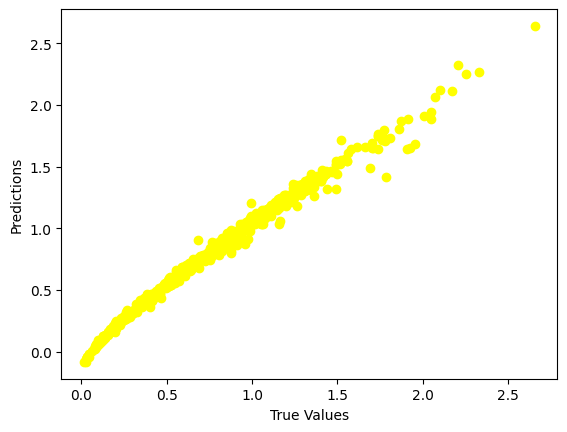

In [37]:
plt.scatter(y_test,y_test_pred , c='yellow')
plt.xlabel('True Values')
plt.ylabel('Predictions')

Measure the performance using Metrics.

In [38]:
from sklearn.metrics import r2_score
p = r2_score(y_test, y_test_pred)
p = r2_score(y_test, y_test_pred)
p

0.9847147552530437

In [39]:
from sklearn.metrics import mean_squared_error
p = mean_squared_error(y_test, y_test_pred)
p

0.0034615730629899053

In [40]:
svr.score(X_test, y_test)

0.9847147552530437